In [1]:
# PreProcessing of Legal Documents

import fitz  # PyMuPDF
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stop words and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]

    # Stemming
    #ps = PorterStemmer()
    #words = [ps.stem(word) for word in words]

    return " ".join(words)

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    
    for page_num in range(doc.page_count):
        page = doc[page_num]
        text += page.get_text()
        
        
        # Skip the first 14 lines on each page
        lines = page.get_text("text").split('\n')[14:]
        text += '\n'.join(lines)

    doc.close()
    return text

# Replace 'your_pdf_file.pdf' with the actual PDF file path
pdf_path = 'Case62_Kaushik_Sadhukhan_and_Ors_vs__The_State_of_West_BeWB201501091523045779COM45503.pdf'
pdf_text = extract_text_from_pdf(pdf_path)

# Preprocess the text
preprocessed_text = preprocess_text(pdf_text)

print("Preprocessed Text:")
print(preprocessed_text)


Preprocessed Text:
high court calcutta cra decided appellants kaushik sadhukhan ors respondent state west bengal nadira patherya indrajit chatterjee jj counsels bikash ranjan bhattacharya sr rahul sarkar tatini sengupta manjit singh learned pawan kumar gupta judgment indrajit chatterjee j appeal directed judgment order conviction passed learned additional district sessions judge second court serampore hooghly sessions case sessions trial arising case arose serampore case dated sections indian penal code code present appellants convicted sentenced suffer life imprisonment offence punishable section read section along section code accused appellant kaushik sadhukhan sentenced suffer imprisonment two years respect offence punishable section said code trial court directed sentences run concurrently thus even though present appellants convicted respect charge punishable section code learned trial court pass separate sentence threats trial court also ordered set section code criminal procedu

[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Showing the removed stop words

import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Vectorization applied in the Documents

import fitz  # PyMuPDF
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stop words and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]

    return " ".join(words)

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""

    for page_num in range(doc.page_count):
        page = doc[page_num]

        # Skip the first 14 lines on each page
        lines = page.get_text("text").split('\n')[14:]
        text += '\n'.join(lines)

    doc.close()
    return text

# Replace 'your_pdf_file.pdf' with the actual PDF file path
pdf_path = 'Case2.pdf'
pdf_text = extract_text_from_pdf(pdf_path)

# Preprocess the text
preprocessed_text = preprocess_text(pdf_text)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text
tfidf_matrix = vectorizer.fit_transform([preprocessed_text])

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array
dense_array = tfidf_matrix.toarray()

# Create a dictionary with words and their corresponding TF-IDF values
word_tfidf_dict = dict(zip(feature_names, dense_array.flatten()))

# Print the TF-IDF values for each word
for word, tfidf_value in word_tfidf_dict.items():
    print(f"{word}: {tfidf_value}")

able: 0.014847846772912466
abrasion: 0.029695693545824933
absence: 0.029695693545824933
abusive: 0.014847846772912466
according: 0.014847846772912466
accordingly: 0.014847846772912466
account: 0.014847846772912466
accrue: 0.014847846772912466
accumulation: 0.014847846772912466
accused: 0.11878277418329973
act: 0.059391387091649865
acts: 0.014847846772912466
additional: 0.014847846772912466
administering: 0.029695693545824933
administration: 0.014847846772912466
admissible: 0.029695693545824933
allegation: 0.014847846772912466
alleged: 0.0445435403187374
alone: 0.014847846772912466
along: 0.014847846772912466
already: 0.014847846772912466
also: 0.0890870806374748
although: 0.014847846772912466
another: 0.0445435403187374
anr: 0.029695693545824933
anybody: 0.014847846772912466
apex: 0.029695693545824933
apparent: 0.014847846772912466
appeal: 0.0445435403187374
appears: 0.029695693545824933
appellant: 0.014847846772912466
appellants: 0.029695693545824933
applied: 0.014847846772912466
appr

[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape of transformed matrix: (7, 7)


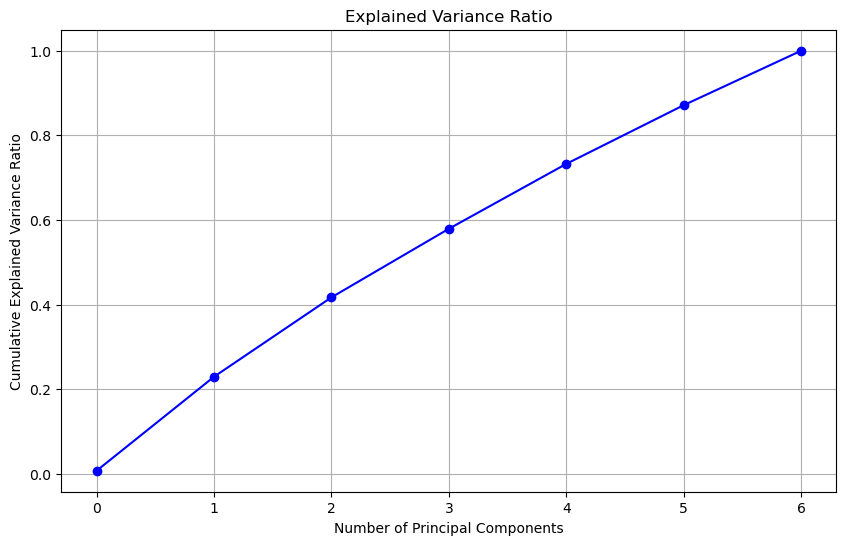

In [4]:
# Applying Singular value Decomposition And Ploting the varience ratio

import fitz  # PyMuPDF
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
import os

# Download NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stop words and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]

    return " ".join(words)

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""

    for page_num in range(doc.page_count):
        page = doc[page_num]

        # Skip the first 14 lines on each page
        lines = page.get_text("text").split('\n')[14:]
        text += '\n'.join(lines)

    doc.close()
    return text

# Directory containing PDF files
pdf_directory = 'My Pdf'

# List to store preprocessed texts from all PDFs
preprocessed_texts = []

# Loop over each PDF file in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        pdf_text = extract_text_from_pdf(pdf_path)
        preprocessed_texts.append(preprocess_text(pdf_text))

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed texts
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

# Perform Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=min(50, tfidf_matrix.shape[1]))  # Adjust number of components
svd_tfidf_matrix = svd.fit_transform(tfidf_matrix)

# Show the shape of the transformed matrix
print("Shape of transformed matrix:", svd_tfidf_matrix.shape)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(svd.explained_variance_ratio_), marker='o', linestyle='-', color='b')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


In [8]:
# Documents Cluster Analysis

import fitz  # PyMuPDF
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import os

# Download NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stop words and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]

    return " ".join(words)

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""

    for page_num in range(doc.page_count):
        page = doc[page_num]

        # Skip the first 14 lines on each page
        lines = page.get_text("text").split('\n')[14:]
        text += '\n'.join(lines)

    doc.close()
    return text

# Directory containing PDF files
pdf_directory = 'My Pdf'

# List to store preprocessed texts from all PDFs
preprocessed_texts = []

# Loop over each PDF file in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        pdf_text = extract_text_from_pdf(pdf_path)
        preprocessed_texts.append(preprocess_text(pdf_text))

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed texts
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

# Perform document clustering using KMeans
n_samples = tfidf_matrix.shape[0]
n_clusters = min(3, n_samples)  # Adjusting the number of clusters based on the number of samples
kmeans = KMeans(n_clusters=n_clusters)  # You can adjust the number of clusters as needed
kmeans.fit(tfidf_matrix)

# Print cluster labels for each document
print("Cluster labels:")
for i, label in enumerate(kmeans.labels_):
    print(f"Document {i+1}: Cluster {label+1}")


[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster labels:
Document 1: Cluster 1
Document 2: Cluster 1
Document 3: Cluster 1
Document 4: Cluster 3
Document 5: Cluster 2
Document 6: Cluster 1
Document 7: Cluster 3


/Users/animesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/animesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


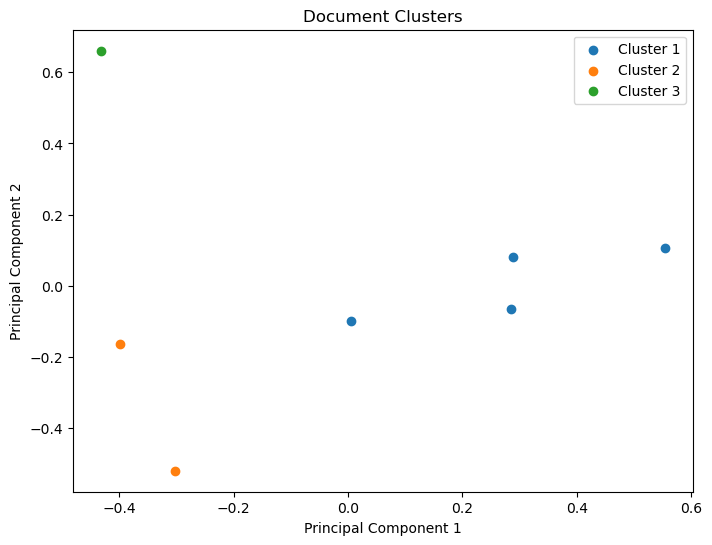

In [7]:
# # Plotting the clusters

import fitz  # PyMuPDF
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os

# Download NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stop words and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]

    return " ".join(words)

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""

    for page_num in range(doc.page_count):
        page = doc[page_num]

        # Skip the first 14 lines on each page
        lines = page.get_text("text").split('\n')[14:]
        text += '\n'.join(lines)

    doc.close()
    return text

# Directory containing PDF files
pdf_directory = 'My Pdf'

# List to store preprocessed texts from all PDFs
preprocessed_texts = []

# Loop over each PDF file in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        pdf_text = extract_text_from_pdf(pdf_path)
        preprocessed_texts.append(preprocess_text(pdf_text))

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed texts
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

# Perform document clustering using KMeans
n_samples = tfidf_matrix.shape[0]
n_clusters = min(3, n_samples)  # Adjusting the number of clusters based on the number of samples
kmeans = KMeans(n_clusters=n_clusters)  # You can adjust the number of clusters as needed
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)  # 2 principal components for 2D visualization
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    plt.scatter(tfidf_pca[cluster_labels == cluster, 0], tfidf_pca[cluster_labels == cluster, 1], label=f'Cluster {cluster+1}')
plt.title('Document Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


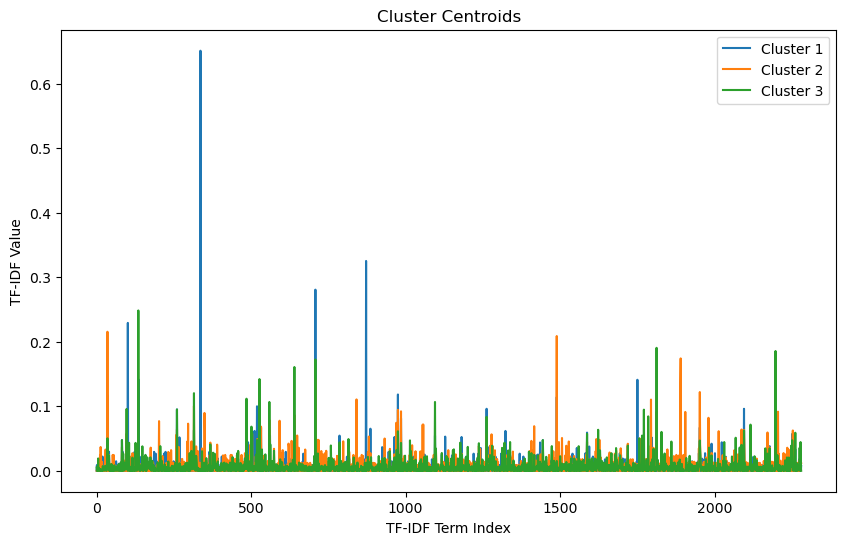

In [9]:
# Ploting clustering centroids as lines

import fitz  # PyMuPDF
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import os

# Download NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stop words and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]

    return " ".join(words)

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""

    for page_num in range(doc.page_count):
        page = doc[page_num]

        # Skip the first 14 lines on each page
        lines = page.get_text("text").split('\n')[14:]
        text += '\n'.join(lines)

    doc.close()
    return text

# Directory containing PDF files
pdf_directory = 'My Pdf'

# List to store preprocessed texts from all PDFs
preprocessed_texts = []

# Loop over each PDF file in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        pdf_text = extract_text_from_pdf(pdf_path)
        preprocessed_texts.append(preprocess_text(pdf_text))

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed texts
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

# Perform document clustering using KMeans
n_samples = tfidf_matrix.shape[0]
n_clusters = min(3, n_samples)  # Adjusting the number of clusters based on the number of samples
kmeans = KMeans(n_clusters=n_clusters)  # You can adjust the number of clusters as needed
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Compute cluster centroids
cluster_centroids = np.zeros((n_clusters, tfidf_matrix.shape[1]))
for cluster in range(n_clusters):
    cluster_centroids[cluster] = tfidf_matrix[cluster_labels == cluster].mean(axis=0)

# Plot cluster centroids as lines
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.plot(cluster_centroids[cluster], label=f'Cluster {cluster+1}')
plt.title('Cluster Centroids')
plt.xlabel('TF-IDF Term Index')
plt.ylabel('TF-IDF Value')
plt.legend()
plt.show()




In [10]:
# Generating Cluster Summerary

import fitz
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import os

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    sentences = sent_tokenize(text)
    stop_words = set(stopwords.words('english'))
    preprocessed_sentences = []
    for sentence in sentences:
        words = [word.lower() for word in sentence.split() if word.isalpha() and word.lower() not in stop_words]
        preprocessed_sentences.append(" ".join(words))
    return " ".join(preprocessed_sentences)

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        lines = page.get_text("text").split('\n')[14:]
        text += '\n'.join(lines)
    doc.close()
    return text

pdf_directory = 'My Pdf'
preprocessed_texts = []

for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        pdf_text = extract_text_from_pdf(pdf_path)
        preprocessed_texts.append(preprocess_text(pdf_text))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

n_samples = tfidf_matrix.shape[0]
n_clusters = min(3, n_samples)
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

cluster_sentences = [[] for _ in range(n_clusters)]
for i, label in enumerate(cluster_labels):
    sentences = sent_tokenize(preprocessed_texts[i])
    cluster_sentences[label].extend(sentences)

# Generate summaries from each cluster
cluster_summaries = []
for cluster in range(n_clusters):
    cluster_text = " ".join(cluster_sentences[cluster])
    cluster_summaries.append(cluster_text)

# Print summaries from each cluster
for i, summary in enumerate(cluster_summaries):
    print(f"Cluster {i+1} Summary:")
    print(summary)
    print()


[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster 1 Summary:
judgment   appellants preferred two separate appeals challenging common judgment order conviction sentence imposed learned additional sessions kalna offence sections indian penal code called sessions trial arising sessions case  elder deceased chandana ghosh preferred cra husband amal kumar ghosh preferred appeal cra  husband amal kumar ghosh sentenced suffer years pay fine default one year offence section ipc sentenced suffer years offence section three appellants preferred cra sentenced suffer simple imprisonment years pay fine  suffer months offence section ipc sentenced suffer years simple imprisonment offence section intend dispose appeals common judgment  prosecution story according fir chandana ghosh married amal kumar youngest son ananda mohan ghosh par sahapur within kalna time marriage bharies gold ornaments gift items furniture worth given terms demands made bridegroom days marriage accused persons started inflicting severe mental physical torture upon cha

In [1]:
# Generating more Efficient cluster summaries

import fitz
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import os

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    sentences = sent_tokenize(text)
    stop_words = set(stopwords.words('english'))
    preprocessed_sentences = []
    for sentence in sentences:
        words = [word.lower() for word in word_tokenize(sentence) if word.isalpha() and word.lower() not in stop_words]
        preprocessed_sentences.append(" ".join(words))
    return " ".join(preprocessed_sentences)

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        lines = page.get_text("text").split('\n')[14:]
        text += '\n'.join(lines)
    doc.close()
    return text

def rank_sentences(tfidf_matrix, cluster_labels, cluster_sentences):
    sentence_scores = []
    for i, sentences in enumerate(cluster_sentences):
        cluster_tfidf = tfidf_matrix[cluster_labels == i]
        cluster_sentence_scores = np.sum(cluster_tfidf, axis=1)
        sentence_scores.append(list(zip(sentences, cluster_sentence_scores)))
    return sentence_scores

def generate_summary(sentence_scores):
    cluster_summaries = []
    for cluster in sentence_scores:
        sorted_sentences = sorted(cluster, key=lambda x: x[1], reverse=True)
        summary_sentences = [sentence for sentence, score in sorted_sentences][:3]  # Extract top 3 sentences
        cluster_summary = " ".join(summary_sentences)
        cluster_summaries.append(cluster_summary)
    return cluster_summaries

pdf_directory = 'My Pdf'
preprocessed_texts = []

for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        pdf_text = extract_text_from_pdf(pdf_path)
        preprocessed_texts.append(preprocess_text(pdf_text))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

n_samples = tfidf_matrix.shape[0]
n_clusters = min(3, n_samples)
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

cluster_sentences = [[] for _ in range(n_clusters)]
for i, label in enumerate(cluster_labels):
    sentences = sent_tokenize(preprocessed_texts[i])
    cluster_sentences[label].extend(sentences)

sentence_scores = rank_sentences(tfidf_matrix, cluster_labels, cluster_sentences)
cluster_summaries = generate_summary(sentence_scores)

# Print summaries from each cluster
for i, summary in enumerate(cluster_summaries):
    print(f"Cluster {i+1} Summary:")
    print(summary)
    print()


[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster 1 Summary:
judgment sinha j  appellants preferred two separate appeals challenging common judgment order conviction sentence imposed learned additional sessions judge kalna offence sections indian penal code hereinafter called ipc sessions trial arising sessions case  elder deceased chandana ghosh preferred cra husband amal kumar ghosh preferred appeal cra  husband amal kumar ghosh sentenced suffer years pay fine rs default one year offence section ipc sentenced suffer years offence section ipc three appellants preferred cra sentenced suffer simple imprisonment years pay fine rs  suffer months offence section ipc sentenced suffer years simple imprisonment offence section ipc intend dispose appeals common judgment order  prosecution story according fir ext short chandana ghosh deceased married amal kumar ghosh youngest son ananda mohan ghosh par sahapur within kalna time marriage rs cash bharies gold ornaments gift items furniture worth rs given terms demands made bridegroom par

/Users/animesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [2]:
# Adding the option of custom stopwords

import fitz
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import os

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    sentences = sent_tokenize(text)
    stop_words = set(stopwords.words('english'))
    
    # Extend with custom stop words
    custom_stop_words = set(["custom_stopword1", "custom_stopword2"])  # Add your custom stop words here
    stop_words.update(custom_stop_words)
    
    preprocessed_sentences = []
    for sentence in sentences:
        words = [word.lower() for word in word_tokenize(sentence) if word.isalpha() and word.lower() not in stop_words]
        preprocessed_sentences.append(" ".join(words))
    return " ".join(preprocessed_sentences)

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        lines = page.get_text("text").split('\n')[14:]
        text += '\n'.join(lines)
    doc.close()
    return text

pdf_directory = 'My Pdf'
preprocessed_texts = []

for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        pdf_text = extract_text_from_pdf(pdf_path)
        preprocessed_texts.append(preprocess_text(pdf_text))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

n_samples = tfidf_matrix.shape[0]
n_clusters = min(3, n_samples)
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

cluster_sentences = [[] for _ in range(n_clusters)]
for i, label in enumerate(cluster_labels):
    sentences = sent_tokenize(preprocessed_texts[i])
    cluster_sentences[label].extend(sentences)

# Generate summaries from each cluster
cluster_summaries = []
for cluster in range(n_clusters):
    cluster_text = " ".join(cluster_sentences[cluster])
    cluster_summaries.append(cluster_text)

# Print summaries from each cluster
for i, summary in enumerate(cluster_summaries):
    print(f"Cluster {i+1} Summary:")
    print(summary)
    print()


[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster 1 Summary:
judgment bhattacharya jj  hearing stems appeal preferred judgment order conviction sentence passed id additional sessions judge court hooghly sessions trial   shortly put shorn details prosecution case marriage smritirani singha third sister de facto complainant took place accused subhasish various kinds dowry demanded pranab kumar singha given marriage subjected insult abuse annapurna singha bangabala singha since deceased framing charge issue dowry time visit father house varanasi used narrate torture birth daughter degree torture upon physical mental increased many occasions said accused persons assaulted threatened dire consequences husband never protested said set fire child pouring kerosene oil severe burn injuries removed burdwan medical college hospital child expired date fighting death receipt said information complainant came hospital varanasi busy connection treatment sister delay lodging fir hence three accused persons charged sections ipc  defence case s

/Users/animesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [1]:
# Finding out the similarities from the the pdf files and the cluster summaries

import fitz
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import os

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    sentences = sent_tokenize(text)
    stop_words = set(stopwords.words('english'))
    
    # Extend with custom stop words
    custom_stop_words = set(["custom_stopword1", "custom_stopword2"])  # Add your custom stop words here
    stop_words.update(custom_stop_words)
    
    preprocessed_sentences = []
    for sentence in sentences:
        words = [word.lower() for word in word_tokenize(sentence) if word.isalpha() and word.lower() not in stop_words]
        preprocessed_sentences.append(" ".join(words))
    return " ".join(preprocessed_sentences)

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        lines = page.get_text("text").split('\n')[14:]
        text += '\n'.join(lines)
    doc.close()
    return text

def highlight_summary_points(pdf_path, cluster_summary):
    doc = fitz.open(pdf_path)
    matches = []
    for page_num in range(doc.page_count):
        page = doc[page_num]
        page_text = page.get_text()
        for sentence in sent_tokenize(page_text):
            for summary_sentence in sent_tokenize(cluster_summary):
                if summary_sentence in sentence:
                    matches.append((page_num, sentence))
    doc.close()
    return matches

pdf_directory = 'My Pdf'
preprocessed_texts = []

for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        pdf_text = extract_text_from_pdf(pdf_path)
        preprocessed_texts.append(preprocess_text(pdf_text))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

n_samples = tfidf_matrix.shape[0]
n_clusters = min(3, n_samples)
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

cluster_sentences = [[] for _ in range(n_clusters)]
for i, label in enumerate(cluster_labels):
    sentences = sent_tokenize(preprocessed_texts[i])
    cluster_sentences[label].extend(sentences)

# Generate summaries from each cluster
cluster_summaries = []
for cluster in range(n_clusters):
    cluster_text = " ".join(cluster_sentences[cluster])
    cluster_summaries.append(cluster_text)

# Print summaries from each cluster
for i, summary in enumerate(cluster_summaries):
    print(f"Cluster {i+1} Summary:")
    print(summary)
    print()
    
    # Highlight summary points from PDF
    for pdf_file in os.listdir(pdf_directory):
        if pdf_file.endswith('My Pdf'):
            pdf_path = os.path.join(pdf_directory, pdf_file)
            summary_matches = highlight_summary_points(pdf_path, summary)
            if summary_matches:
                print(f"Matches in {pdf_file}:")
                for match in summary_matches:
                    print(f"Page {match[0]+1}: {match[1]}")
                print()


[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster 1 Summary:
judgment sinha j  appellants preferred two separate appeals challenging common judgment order conviction sentence imposed learned additional sessions judge kalna offence sections indian penal code hereinafter called ipc sessions trial arising sessions case  elder deceased chandana ghosh preferred cra husband amal kumar ghosh preferred appeal cra  husband amal kumar ghosh sentenced suffer years pay fine rs default one year offence section ipc sentenced suffer years offence section ipc three appellants preferred cra sentenced suffer simple imprisonment years pay fine rs  suffer months offence section ipc sentenced suffer years simple imprisonment offence section ipc intend dispose appeals common judgment order  prosecution story according fir ext short chandana ghosh deceased married amal kumar ghosh youngest son ananda mohan ghosh par sahapur within kalna time marriage rs cash bharies gold ornaments gift items furniture worth rs given terms demands made bridegroom par

/Users/animesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
# implementing the search option

import fitz
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import os

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    sentences = sent_tokenize(text)
    stop_words = set(stopwords.words('english'))
    preprocessed_sentences = []
    for sentence in sentences:
        words = [word.lower() for word in sentence.split() if word.isalpha() and word.lower() not in stop_words]
        preprocessed_sentences.append(" ".join(words))
    return " ".join(preprocessed_sentences)

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        lines = page.get_text("text").split('\n')[14:]
        text += '\n'.join(lines)
    doc.close()
    return text

def search_related_lines(search_word, cluster_summaries):
    related_lines = []

    for idx, summary in enumerate(cluster_summaries):
        sentences = sent_tokenize(summary)
        for sentence in sentences:
            if search_word.lower() in sentence.lower():
                # Highlight the searched word in the line
                highlighted_line = sentence.replace(search_word, f"\033[1;31m{search_word}\033[m")
                related_lines.append((idx+1, highlighted_line))  # cluster index starts from 1

    return related_lines

pdf_directory = 'My Pdf'
preprocessed_texts = []

for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        pdf_text = extract_text_from_pdf(pdf_path)
        preprocessed_texts.append(preprocess_text(pdf_text))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

n_samples = tfidf_matrix.shape[0]
n_clusters = min(3, n_samples)
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

cluster_sentences = [[] for _ in range(n_clusters)]
for i, label in enumerate(cluster_labels):
    sentences = sent_tokenize(preprocessed_texts[i])
    cluster_sentences[label].extend(sentences)

# Generate summaries from each cluster
cluster_summaries = []
for cluster in range(n_clusters):
    cluster_text = " ".join(cluster_sentences[cluster])
    cluster_summaries.append(cluster_text)

# Search for a word
search_word = input("Enter a word to search: ")

# Get related lines
related_lines = search_related_lines(search_word, cluster_summaries)

if related_lines:
    print(f"Related lines for '{search_word}':")
    for cluster_idx, line in related_lines:
        print(f"From Cluster {cluster_idx}: {line}")
        print('-' * 50)
else:
    print(f"No related lines found for '{search_word}'")


[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Enter a word to search: dowry
Related lines for 'dowry':
From Cluster 1: judgment   appellants preferred two separate appeals challenging common judgment order conviction sentence imposed learned additional sessions kalna offence sections indian penal code called sessions trial arising sessions case  elder deceased chandana ghosh preferred cra husband amal kumar ghosh preferred appeal cra  husband amal kumar ghosh sentenced suffer years pay fine default one year offence section ipc sentenced suffer years offence section three appellants preferred cra sentenced suffer simple imprisonment years pay fine  suffer months offence section ipc sentenced suffer years simple imprisonment offence section intend dispose appeals common judgment  prosecution story according fir chandana ghosh married amal kumar youngest son ananda mohan ghosh par sahapur within kalna time marriage bharies gold ornaments gift items furniture worth given terms demands made bridegroom days marriage accused persons star

In [1]:
# Summary of each case i.e total 7 cases

import fitz
import nltk
from nltk.tokenize import sent_tokenize
import os

nltk.download('punkt')

def generate_pdf_summary(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        text += page.get_text()
    doc.close()
    sentences = sent_tokenize(text)
    summary = " ".join(sentences[:int(len(sentences) * 0.2)])  # Adjust the percentage as needed
    return summary

pdf_directory = 'My Pdf'

for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        summary = generate_pdf_summary(pdf_path)
        print(f"Summary for {filename}:")
        print(summary)
        print()


[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Summary for Case68_Shyamal_Pyne__vs_State__27012006__CALHCW060082COM513580.pdf:
MANU/WB/0070/2006
Equivalent Citation: 2006(3)CHN101
IN THE HIGH COURT OF CALCUTTA
C.R.A. No. 437 of 2003
Decided On: 27.01.2006
Appellants: Shyamal Pyne 
Vs.
Respondent: State
Hon'ble Judges/Coram:
A.K. Basu and P.K. Deb, JJ. Counsels: 
For Appellant/Petitioner/Plaintiff: J. Bagchi and J.N. Chatterjee, Advs. For Respondents/Defendant: Kazi Safiullah, S.K. Mallick and Sofia Begum, Advs. JUDGMENT
P.K. Deb, J. 1 . This appeal being C. R. A. No. 437 of 2003 has been directed against the
conviction and sentence under Sections 498A IPC and 304B IPC passed by the
learned Sessions Judge, Howrah in connection with Sessions Trial Case No. viii(1) of
1994. 2. This case relates to an unfortunate death of a young lady in her early twenties. What is more shocking is the fact that she died within three months of her marriage. The marriage of the young lady called Swapna Naha with the appellant Shymal Pyne
was solemnised 

In [2]:
# Testing search option using word murder

import fitz
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import os

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    sentences = sent_tokenize(text)
    stop_words = set(stopwords.words('english'))
    preprocessed_sentences = []
    for sentence in sentences:
        words = [word.lower() for word in sentence.split() if word.isalpha() and word.lower() not in stop_words]
        preprocessed_sentences.append(" ".join(words))
    return " ".join(preprocessed_sentences)

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        lines = page.get_text("text").split('\n')[14:]
        text += '\n'.join(lines)
    doc.close()
    return text

def search_related_lines(search_word, cluster_summaries):
    related_lines = []

    for idx, summary in enumerate(cluster_summaries):
        sentences = sent_tokenize(summary)
        for sentence in sentences:
            if search_word.lower() in sentence.lower():
                # Highlight the searched word in the line
                highlighted_line = sentence.replace(search_word, f"\033[1;31m{search_word}\033[m")
                related_lines.append((idx+1, highlighted_line))  # cluster index starts from 1

    return related_lines

pdf_directory = 'My Pdf'
preprocessed_texts = []

for filename in os.listdir(pdf_directory):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, filename)
        pdf_text = extract_text_from_pdf(pdf_path)
        preprocessed_texts.append(preprocess_text(pdf_text))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)

n_samples = tfidf_matrix.shape[0]
n_clusters = min(3, n_samples)
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

cluster_sentences = [[] for _ in range(n_clusters)]
for i, label in enumerate(cluster_labels):
    sentences = sent_tokenize(preprocessed_texts[i])
    cluster_sentences[label].extend(sentences)

# Generate summaries from each cluster
cluster_summaries = []
for cluster in range(n_clusters):
    cluster_text = " ".join(cluster_sentences[cluster])
    cluster_summaries.append(cluster_text)

# Search for a word
search_word = input("Enter a word to search: ")

# Get related lines
related_lines = search_related_lines(search_word, cluster_summaries)

if related_lines:
    print(f"Related lines for '{search_word}':")
    for cluster_idx, line in related_lines:
        print(f"From Cluster {cluster_idx}: {line}")
        print('-' * 50)
else:
    print(f"No related lines found for '{search_word}'")


[nltk_data] Downloading package punkt to /Users/animesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/animesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Enter a word to search: murder
Related lines for 'murder':
From Cluster 1: judgment   appellants preferred two separate appeals challenging common judgment order conviction sentence imposed learned additional sessions kalna offence sections indian penal code called sessions trial arising sessions case  elder deceased chandana ghosh preferred cra husband amal kumar ghosh preferred appeal cra  husband amal kumar ghosh sentenced suffer years pay fine default one year offence section ipc sentenced suffer years offence section three appellants preferred cra sentenced suffer simple imprisonment years pay fine  suffer months offence section ipc sentenced suffer years simple imprisonment offence section intend dispose appeals common judgment  prosecution story according fir chandana ghosh married amal kumar youngest son ananda mohan ghosh par sahapur within kalna time marriage bharies gold ornaments gift items furniture worth given terms demands made bridegroom days marriage accused persons st